In [134]:
#importing modules
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn import svm, datasets
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn import metrics



In [135]:
df_stars= pd.read_csv('stars.csv')
df_stars

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,White,A
238,9235,404940.000000,1112.0000,-11.23,5,White,A


# Exploratory data analysis

In [137]:
df_stars.shape

(240, 7)

In [138]:
df_stars['Star color'].value_counts()

Red                   112
Blue                   55
Blue-white             26
Blue White             10
yellow-white            8
White                   7
Blue white              3
Yellowish White         3
white                   3
Whitish                 2
Orange                  2
yellowish               2
Pale yellow orange      1
White-Yellow            1
Blue                    1
Yellowish               1
Orange-Red              1
Blue white              1
Blue-White              1
Name: Star color, dtype: int64

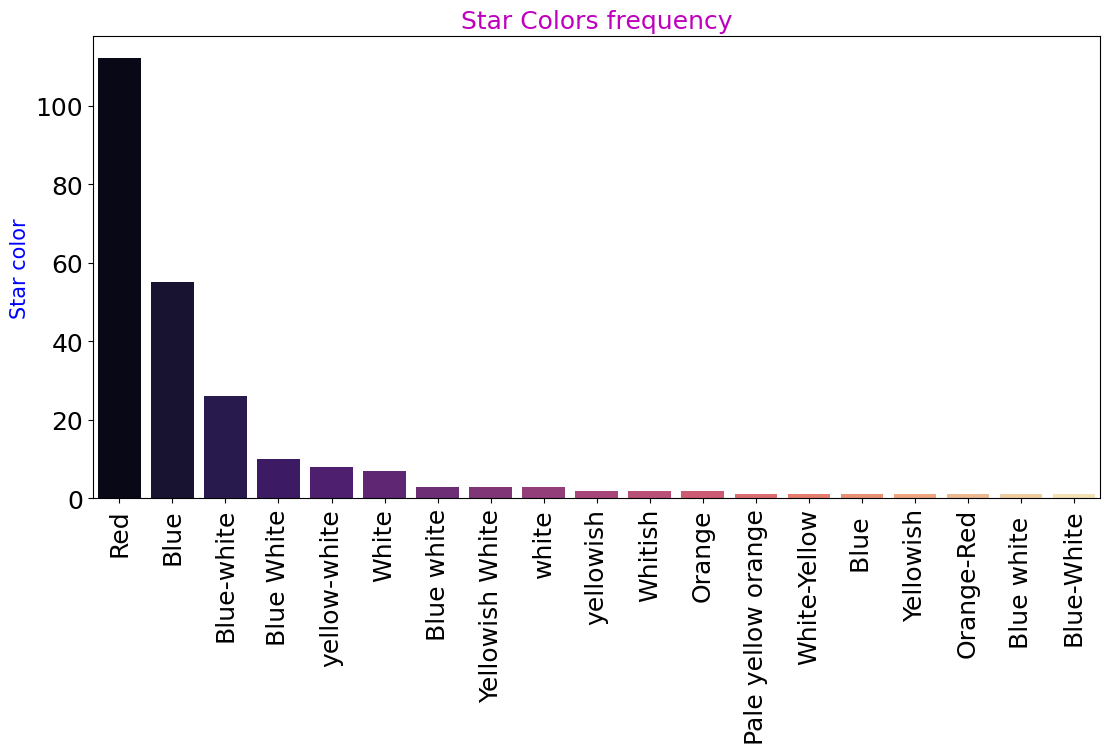

In [139]:
## Visulaising the Star color data
plt.figure(figsize = (13, 6))
color = pd.DataFrame(df_stars['Star color'].value_counts().sort_values(ascending=False))
ax = sns.barplot(x = color.index, y = 'Star color' , data = color, palette='magma')
plt.title("Star Colors frequency", color = "m", fontsize = 18)
plt.ylabel('Star color', color = 'b', fontsize = 15)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
ax = ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

In [140]:
df_stars['Spectral Class'].value_counts()

M    111
B     46
O     40
A     19
F     17
K      6
G      1
Name: Spectral Class, dtype: int64

Class Count
-------------------
 M    111
B     46
O     40
A     19
F     17
K      6
G      1
Name: Spectral Class, dtype: int64





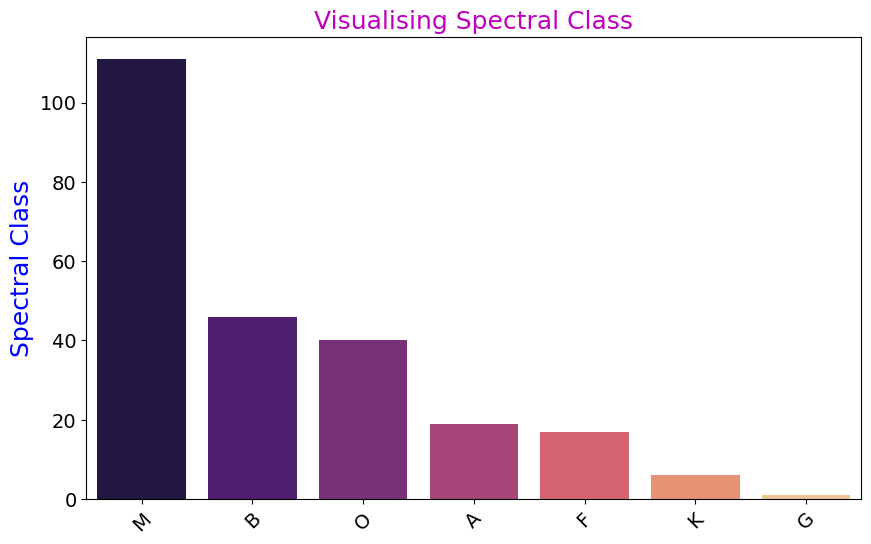

In [141]:
print("Class Count\n-------------------\n", df_stars['Spectral Class'].value_counts())
spectral_class = pd.DataFrame(df_stars['Spectral Class'].value_counts().sort_values(ascending=False))

print("\n\n")

plt.figure(figsize=(10, 6))
ax = sns.barplot(x = spectral_class.index, y = 'Spectral Class' , data = spectral_class, palette='magma')
plt.title("Visualising Spectral Class", color = "m", fontsize = 18)
plt.ylabel('Spectral Class', color = 'b', fontsize = 18)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
ax = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)

/var/folders/tj/ygg930g579178jg8wzs4t0t40000gp/T/ipykernel_3908/2826631236.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_stars.corr(), annot=True)


<Axes: >

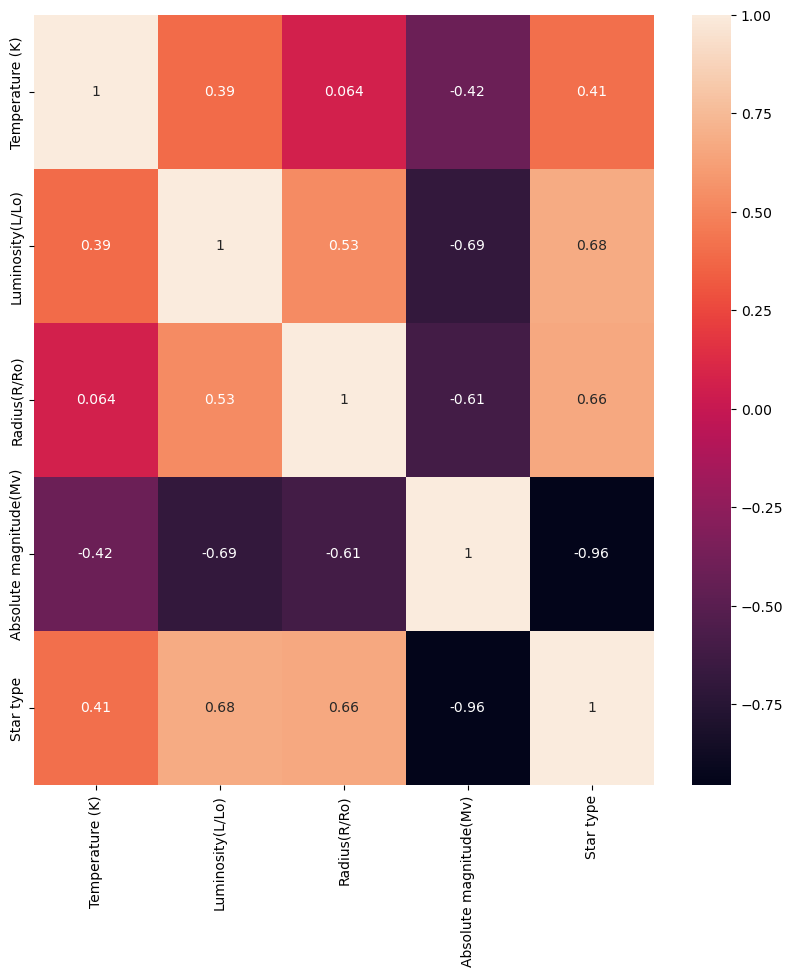

In [142]:
figure= plt.figure(figsize=(10,10))
sns.heatmap(df_stars.corr(), annot=True)

<Axes: xlabel='Temperature (K)', ylabel='Percent'>

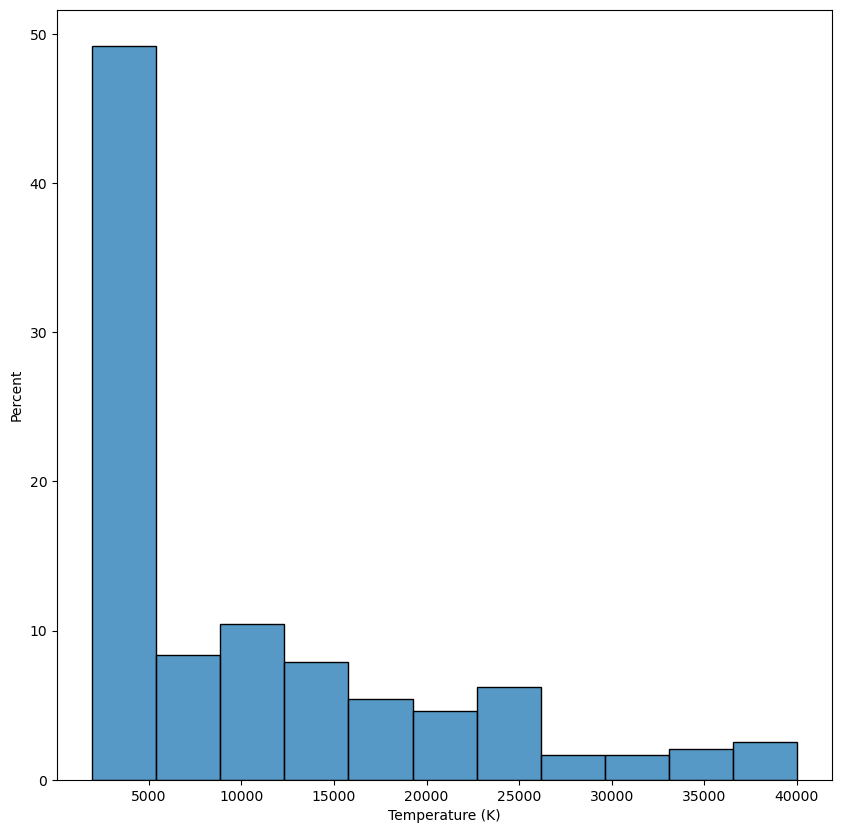

In [143]:
# Plotting histogram for Temperature (K) 
figure= plt.figure(figsize=(10,10))
sns.histplot(df_stars['Temperature (K)'],stat="percent")

/Users/sinkler/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='Temperature (K)', ylabel='Density'>

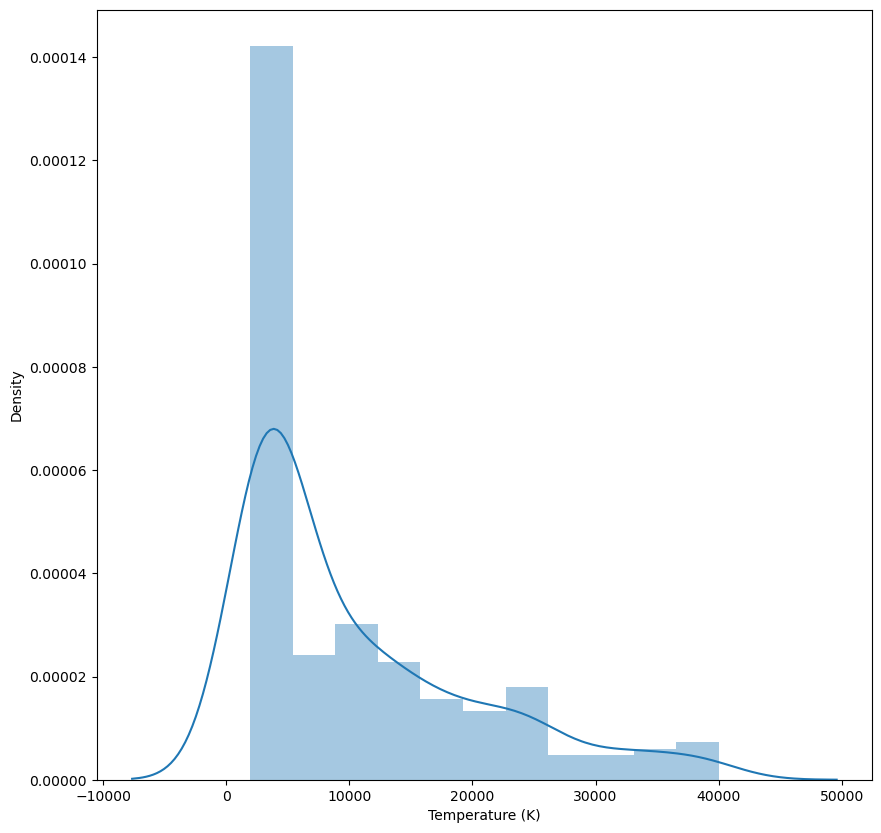

In [144]:
#Stefan-boltzman law
figure= plt.figure(figsize=(10,10))
sns.distplot(df_stars['Temperature (K)'])

<Axes: xlabel='Star color', ylabel='Temperature (K)'>

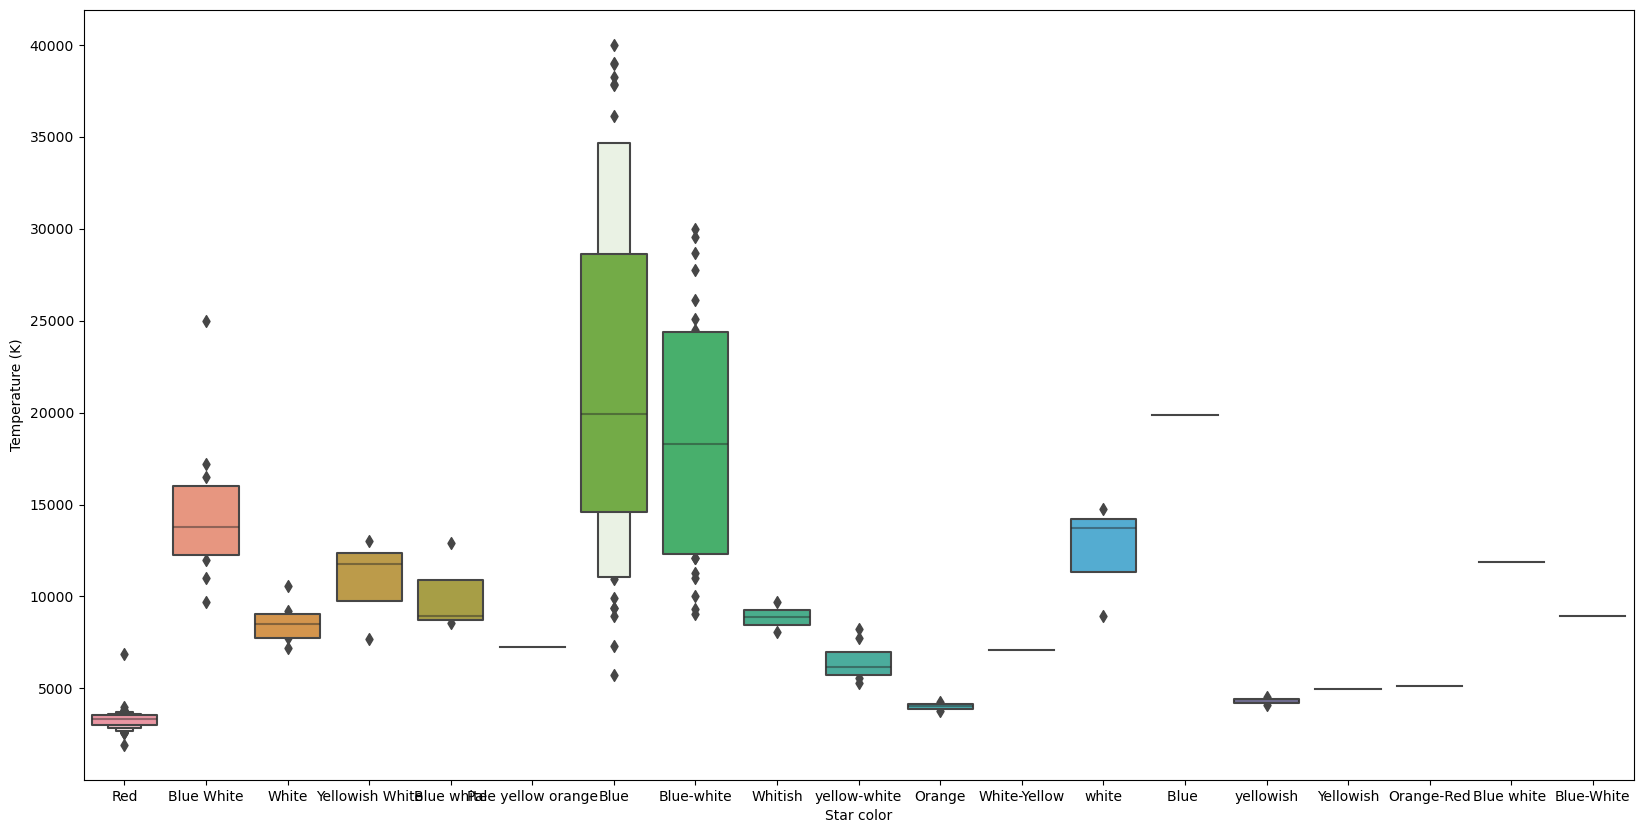

In [145]:
#boxplot temperature
figure= plt.figure(figsize=(20,10))
sns.boxenplot(x='Star color',y='Temperature (K)',data=df_stars)

<Axes: xlabel='Spectral Class', ylabel='Luminosity(L/Lo)'>

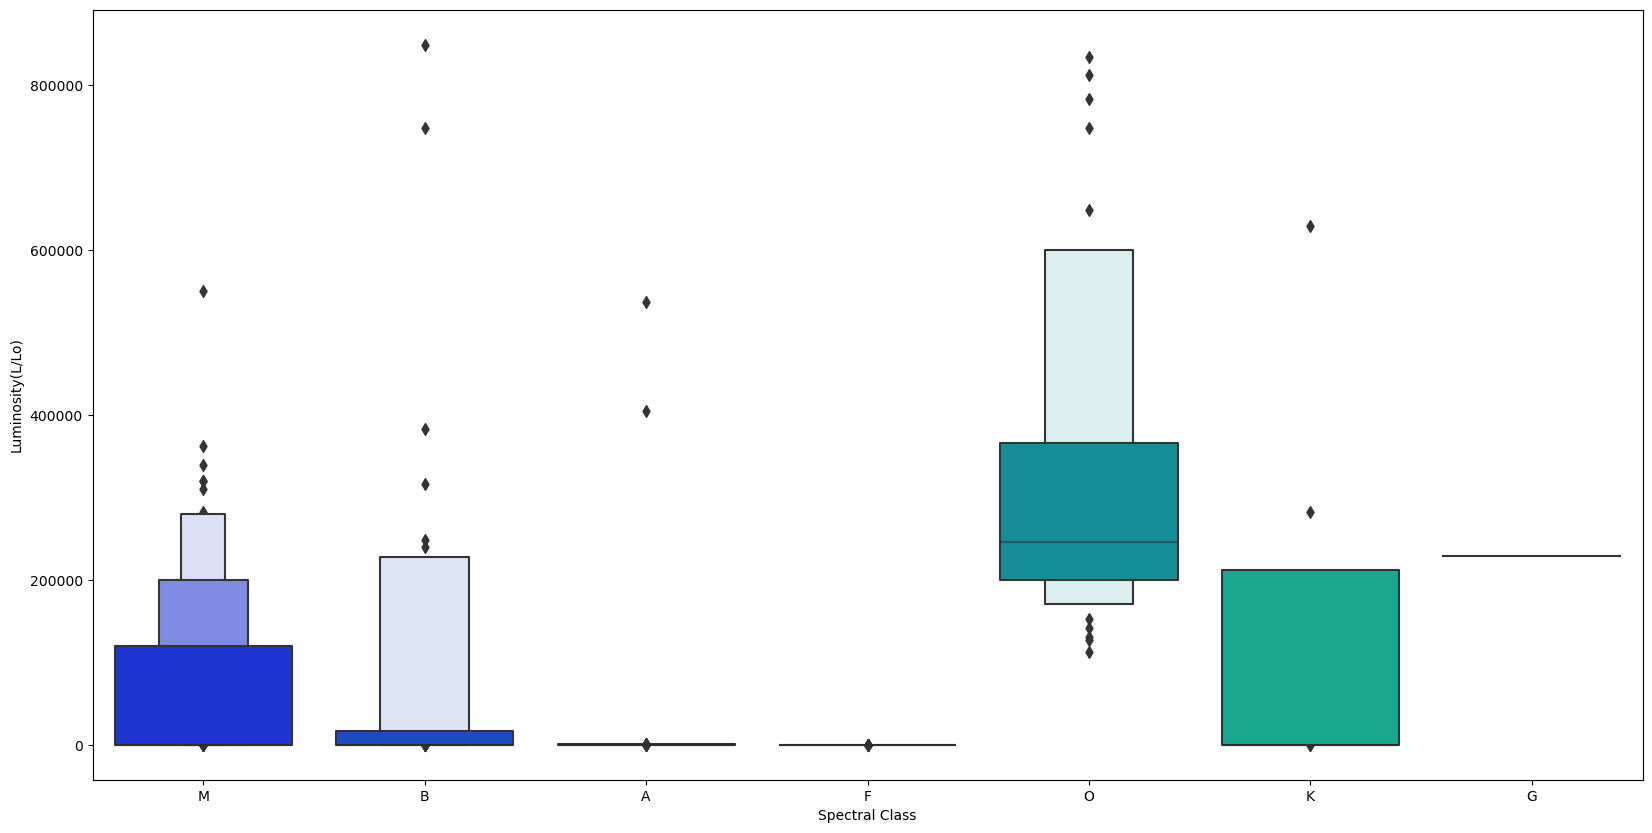

In [146]:
#boxplot luminosity
figure= plt.figure(figsize=(20,10))
sns.boxenplot(x='Spectral Class',y='Luminosity(L/Lo)',data=df_stars,palette='winter')

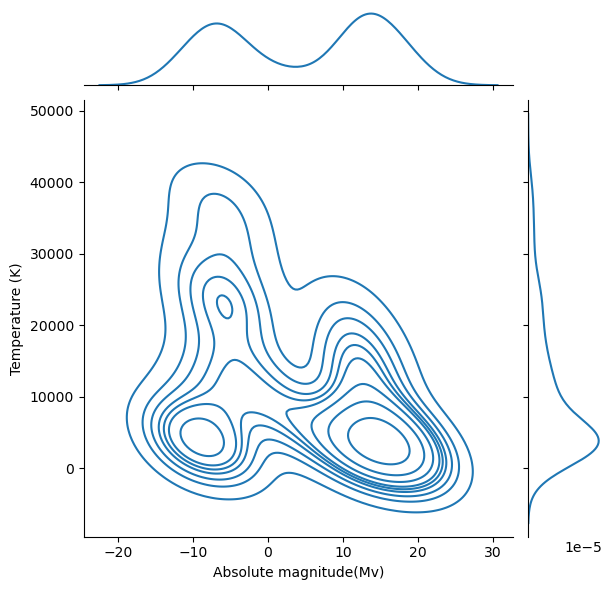

In [147]:
sns.jointplot(x='Absolute magnitude(Mv)',y='Temperature (K)',data=df_stars, kind='kde')

# Data preparation 

In [148]:
Spectral = pd.get_dummies(df_stars['Spectral Class'],drop_first=True)
df_stars.drop('Spectral Class',axis=1,inplace=True)

In [149]:
df_stars = pd.concat([df_stars,Spectral],axis=1)

In [150]:
df_stars=df_stars.drop('Star color',axis=1)

In [151]:
df_stars.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,B,F,G,K,M,O
0,3068,0.002400,0.1700,16.12,0,0,0,0,0,1,0
1,3042,0.000500,0.1542,16.60,0,0,0,0,0,1,0
2,2600,0.000300,0.1020,18.70,0,0,0,0,0,1,0
3,2800,0.000200,0.1600,16.65,0,0,0,0,0,1,0
4,1939,0.000138,0.1030,20.06,0,0,0,0,0,1,0


## What we want to predict?

We want to predict the type of star based in the other variables:  temperature, Luminosity, Radius, Absolute Magnitude. 

y ==> star type 

X ==> other variables

We are going to consider 3 models: Decision tree, random forest and and logistic regression

##  Data splitting

In [152]:
X_train, X_test, y_train, y_test = train_test_split(df_stars.drop('Star type',axis=1),df_stars['Star type'],test_size=0.30,random_state=101)

# Decision tree

In [153]:
from sklearn.tree import DecisionTreeClassifier
dtree= DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions= dtree.predict(X_test)

In [154]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print('__________________________________________________________________________')
print(classification_report(y_test,predictions))

[[13  0  0  0  0  0]
 [ 0  8  0  0  0  0]
 [ 0  0 12  0  0  0]
 [ 0  0  0 17  0  0]
 [ 0  0  0  0  7  0]
 [ 0  0  0  0  0 15]]
__________________________________________________________________________
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        17
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00        15

    accuracy                           1.00        72
   macro avg       1.00      1.00      1.00        72
weighted avg       1.00      1.00      1.00        72



# Random Forest

In [155]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [156]:
predictions_rfr = rfr.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        17
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00        15

    accuracy                           1.00        72
   macro avg       1.00      1.00      1.00        72
weighted avg       1.00      1.00      1.00        72



In [157]:


r_squared_train = rfr.score(X_train, y_train)
print(f'Train set R^2: {r_squared_train}')

r_squared_test = rfr.score(X_test, y_test)
print(f'Test set R^2: {r_squared_test}')


Train set R^2: 0.9995632363797431
Test set R^2: 0.9996185614849188


# Logistic regression


In [158]:
cc_lr = LogisticRegression(random_state=42, max_iter=100)
cc_lr.fit(X_train,y_train)

/Users/sinkler/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [159]:
predictions = cc_lr.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.00      0.00      0.00         8
           2       0.29      1.00      0.45        12
           3       0.90      0.53      0.67        17
           4       1.00      1.00      1.00         7
           5       1.00      0.93      0.97        15

    accuracy                           0.58        72
   macro avg       0.53      0.58      0.51        72
weighted avg       0.57      0.58      0.53        72



/Users/sinkler/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sinkler/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sinkler/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [160]:
r_squared_train = cc_lr.score(X_train, y_train)
print(f'Train set R^2: {r_squared_train}')

r_squared_test = cc_lr.score(X_test, y_test)
print(f'Test set R^2: {r_squared_test}')


Train set R^2: 0.5773809523809523
Test set R^2: 0.5833333333333334


 # Logistic regression with  pipelines and hyper parameter

In [161]:
import numpy as np
import pandas as pd

from sklearn import svm, datasets
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn import metrics

y_p = df_stars['Star type']
X_p= df_stars.drop('Star type',axis=1)


In [162]:
X_p_train, X_p_test, y_p_train, y_p_test = train_test_split(X_p,y_p, random_state=0, test_size=0.2)


In [163]:
## Numerical columns:
num_cols = X_p.select_dtypes(include=np.number).columns
## Categorical columns
cat_cols = X_p.select_dtypes(include=['object']).columns

In [164]:
cat_vals = Pipeline([("imputer",SimpleImputer(strategy='most_frequent')), ("ohe",OneHotEncoder(sparse=False, drop='first', handle_unknown = 'ignore'))])

num_vals = Pipeline([("imputer",SimpleImputer(strategy='mean')), ("scale",StandardScaler())])



In [166]:
preprocess = ColumnTransformer(
    transformers=[
        ("cat_preprocess", cat_vals, cat_cols),
        ("num_preprocess", num_vals, num_cols)
    ]
)

In [167]:
pipeline = Pipeline([("preprocess",preprocess), 
                     ("regr",LinearRegression())])

In [168]:
pipeline.fit(X_p_train, y_p_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_preprocess',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  Index([], dtype='object')),
                                                 ('num_preprocess',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)',
       'Absolute magnitude(Mv)', 'B', 'F', 'G', 'K', 'M', 'O'],
      dtype='object'))])),
                ('regr', LinearRegression())])

In [169]:
search_space = [{'regr': [LinearRegression()], 'regr__fit_intercept': [True,False]},
                {'regr':[Ridge()],
                     'regr__alpha': [0.01,0.1,1,10,100]},
                {'regr':[Lasso()],
                     'regr__alpha': [0.01,0.1,1,10,100]}]


In [170]:
gs = GridSearchCV(pipeline, search_space, scoring='neg_mean_squared_error', cv=5)


In [171]:
##Fit to training data
gs.fit(X_p_train, y_p_train)


## Find the best pipeline
best_pipeline = gs.best_estimator_




In [178]:
#14. Print attributes of best_model
print('The best classification model is:')
print(best_pipeline.named_steps['regr'])
print('The hyperparameters of the best classification model are:')
print(best_pipeline.named_steps['regr'].get_params())
# 15. Print final accuracy score 
print('Best Model Accuracy Test Set:')
print(best_pipeline.score(X_p_test,y_p_test))
#predictions


The best classification model is:
Lasso(alpha=0.01)
The hyperparameters of the best classification model are:
{'alpha': 0.01, 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000, 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}
Best Model Accuracy Test Set:
0.9539376033931699


# Conclusions

* Various algorithms can be used in the same dataset

*  Decision treee get a 100% accuracy probably to the reduced size of the data set

*  Hyperparamters and piplelines are very useful to improve a model like logistic regression

* Is essential to have a good data set

* In the future a larger dataset can be iteresting to work with



